In [1]:
from network import *

labels = loadLabels('CamVid/')

imageSize = (256, 256)

train_x, train_y = loadDataset('CamVid/', 'train', 369, labels, imageSize)

In [2]:
model = createUNet([imageSize[0], imageSize[1], 3], [5, 5], 5, len(labels))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [3]:
trained = model.fit(train_x, train_y, batch_size=5, epochs=60)

Epoch 1/60
74/74 ━━━━━━━━━━━━━━━━━━━━ 42s 540ms/step - accuracy: 0.2596 - loss: 0.2301
Epoch 2/60
74/74 ━━━━━━━━━━━━━━━━━━━━ 44s 594ms/step - accuracy: 0.6161 - loss: 0.0637
Epoch 3/60
74/74 ━━━━━━━━━━━━━━━━━━━━ 45s 610ms/step - accuracy: 0.6491 - loss: 0.0559
Epoch 4/60
74/74 ━━━━━━━━━━━━━━━━━━━━ 44s 598ms/step - accuracy: 0.6725 - loss: 0.0525
Epoch 5/60
74/74 ━━━━━━━━━━━━━━━━━━━━ 44s 599ms/step - accuracy: 0.6944 - loss: 0.0490
Epoch 6/60
74/74 ━━━━━━━━━━━━━━━━━━━━ 44s 600ms/step - accuracy: 0.7298 - loss: 0.0447
Epoch 7/60
74/74 ━━━━━━━━━━━━━━━━━━━━ 45s 601ms/step - accuracy: 0.7578 - loss: 0.0411
Epoch 8/60
74/74 ━━━━━━━━━━━━━━━━━━━━ 44s 599ms/step - accuracy: 0.7805 - loss: 0.0374
Epoch 9/60
74/74 ━━━━━━━━━━━━━━━━━━━━ 44s 597ms/step - accuracy: 0.7960 - loss: 0.0353
Epoch 10/60
74/74 ━━━━━━━━━━━━━━━━━━━━ 44s 596ms/step - accuracy: 0.8169 - loss: 0.0320
Epoch 11/60
74/74 ━━━━━━━━━━━━━━━━━━━━ 44s 596ms/step - accuracy: 0.8190 - loss: 0.0312
Epoch 12/60
74/74 ━━━━━━━━━━━━━━━━━━━━ 44

In [4]:
del train_x, train_y
test_x, test_y = loadDataset('CamVid/', 'test', 20, labels, imageSize)

test_scores = model.evaluate(test_x, test_y, batch_size=2, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

10/10 - 1s - 94ms/step - accuracy: 0.8172 - loss: 0.0333
Test loss: 0.0332912877202034
Test accuracy: 0.8171989321708679


In [8]:
predictions = model.predict(test_x, batch_size=1)

20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step


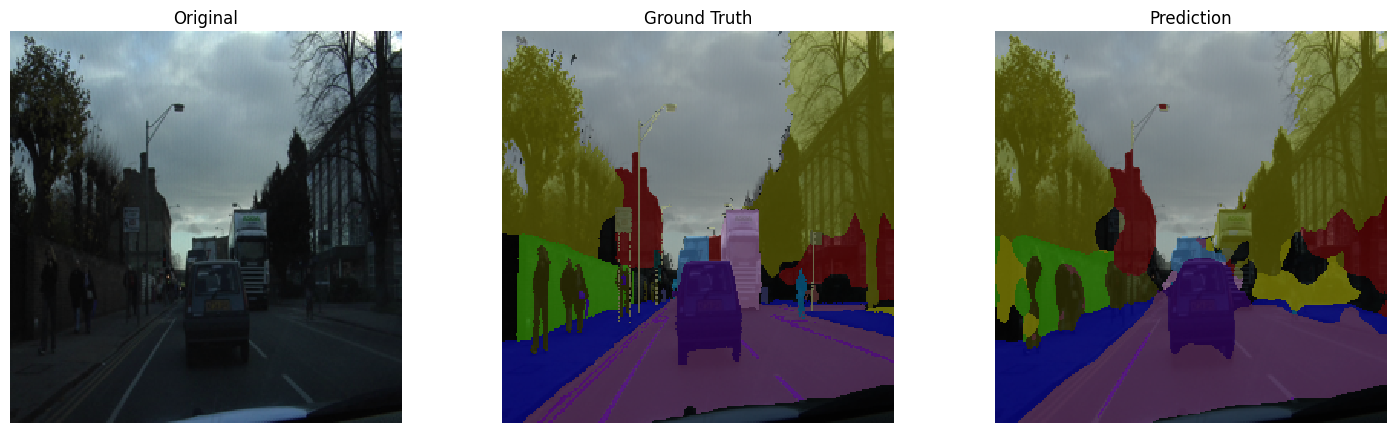

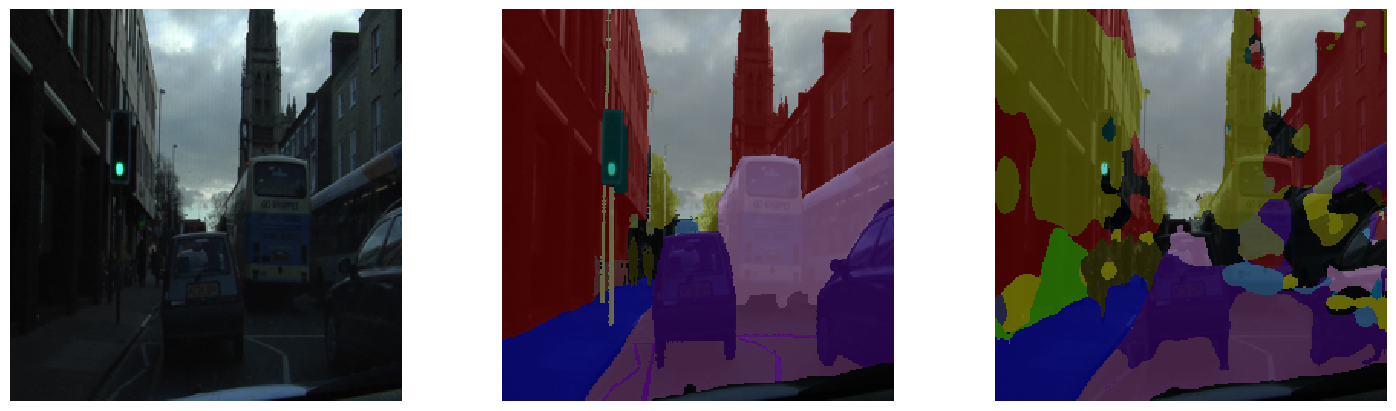

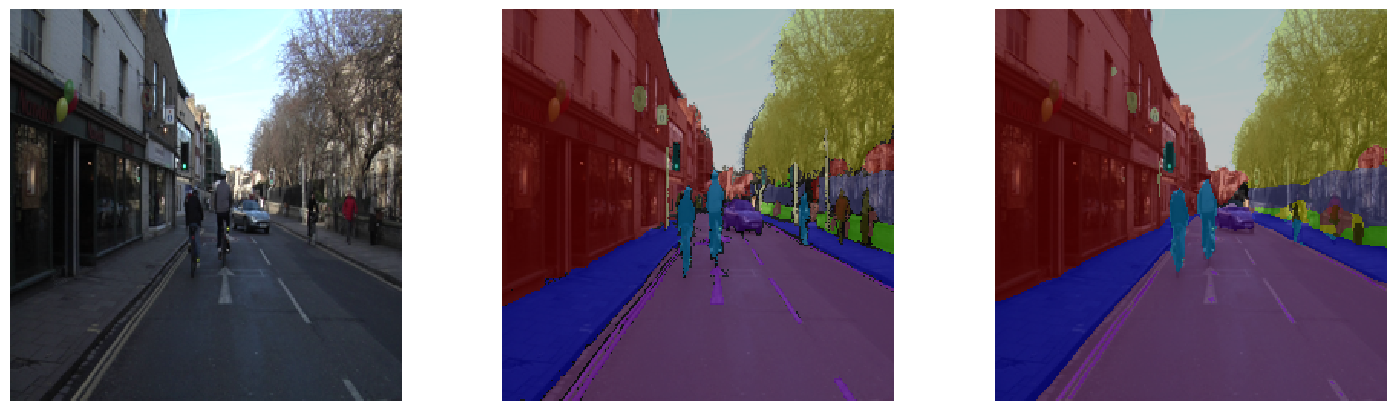

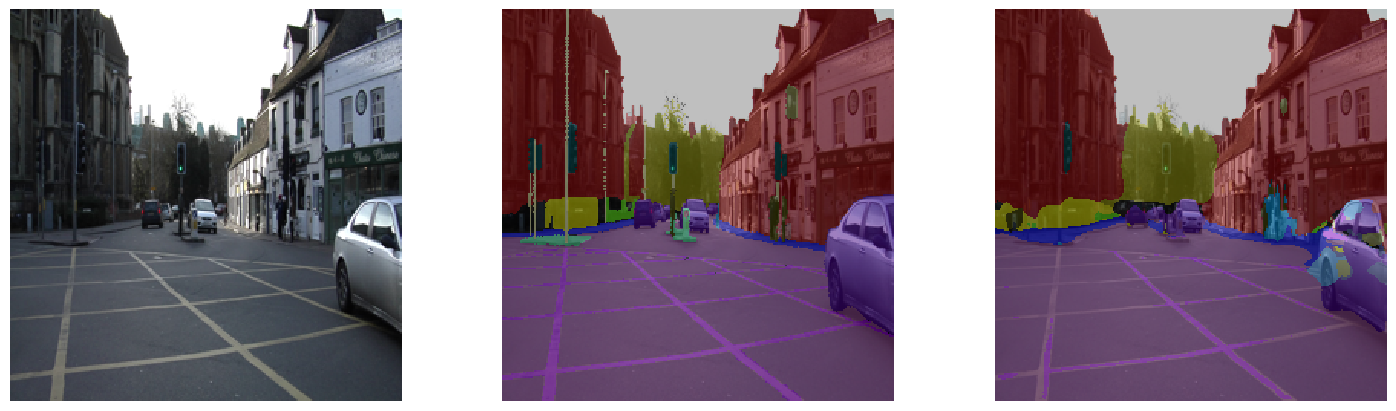

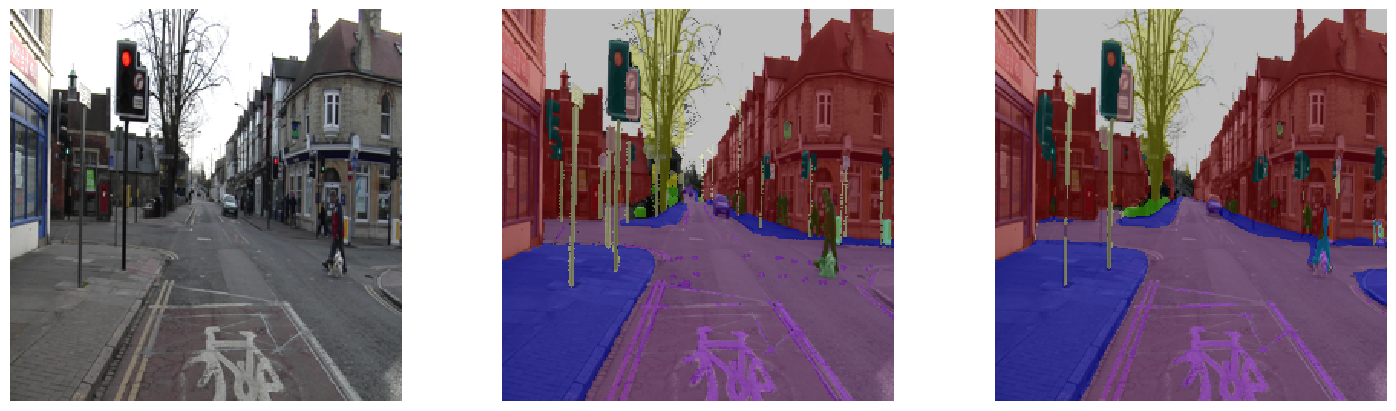

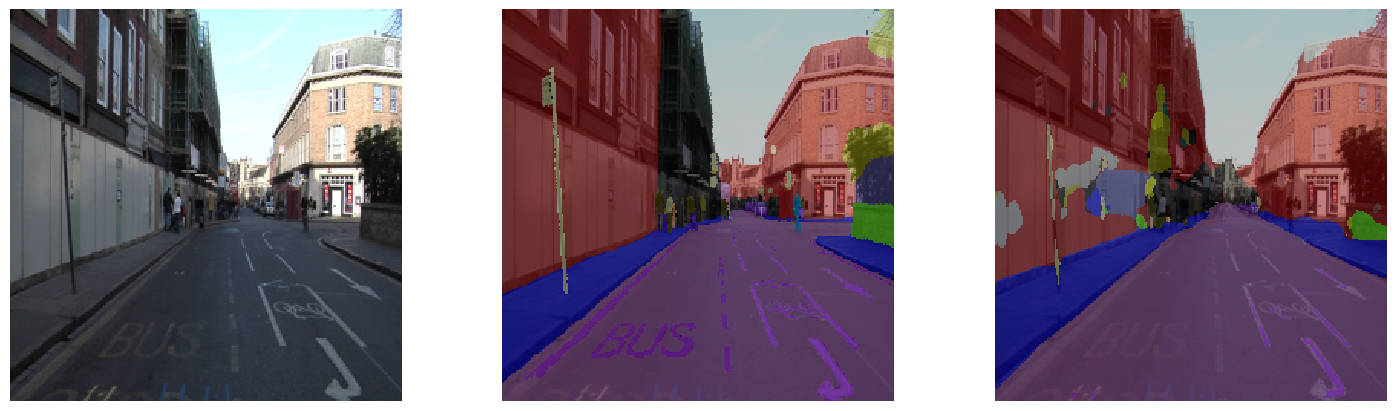

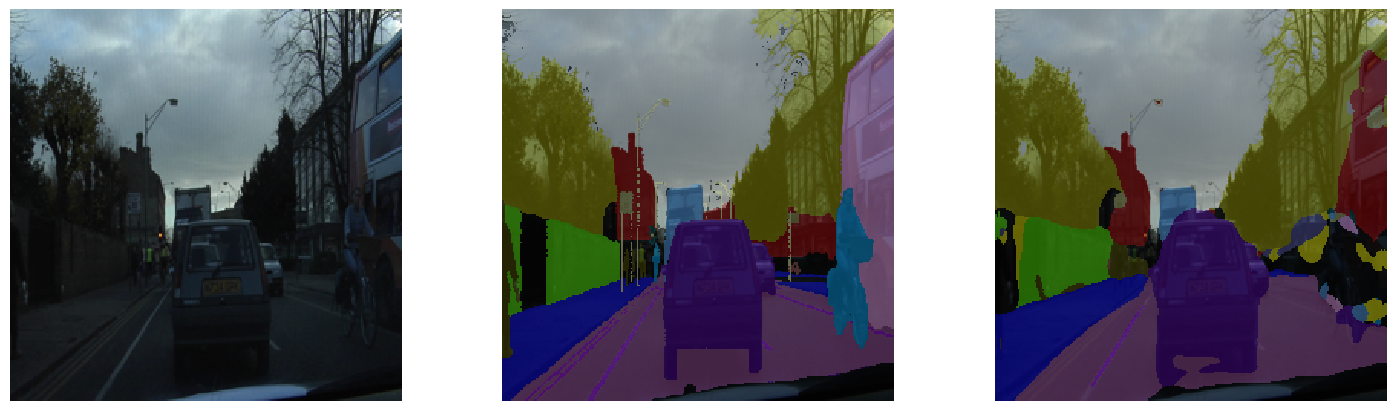

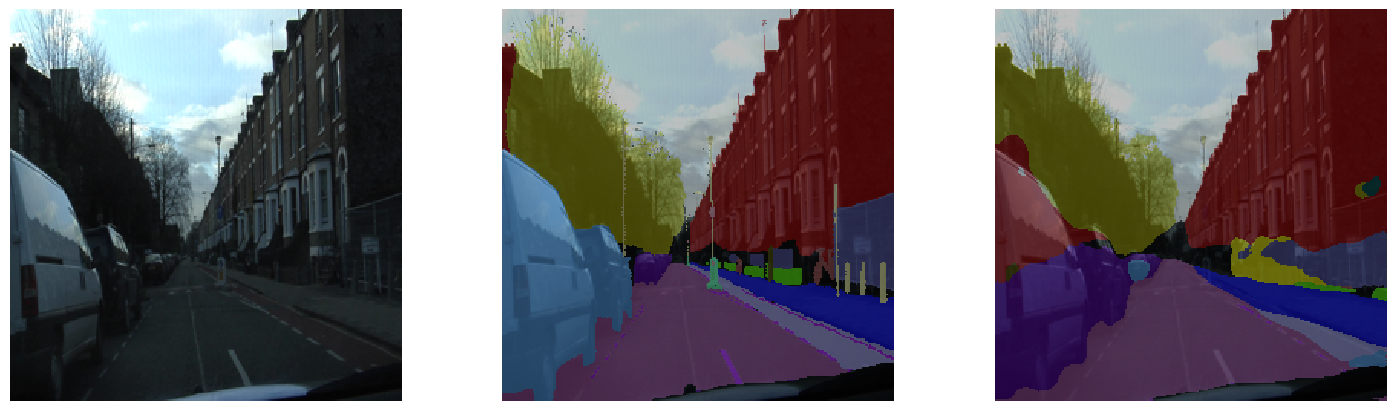

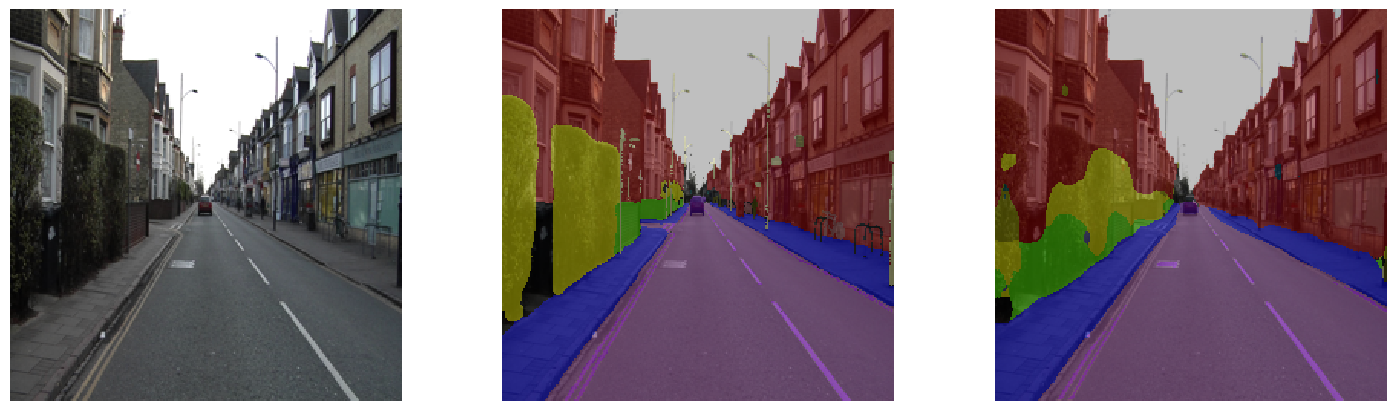

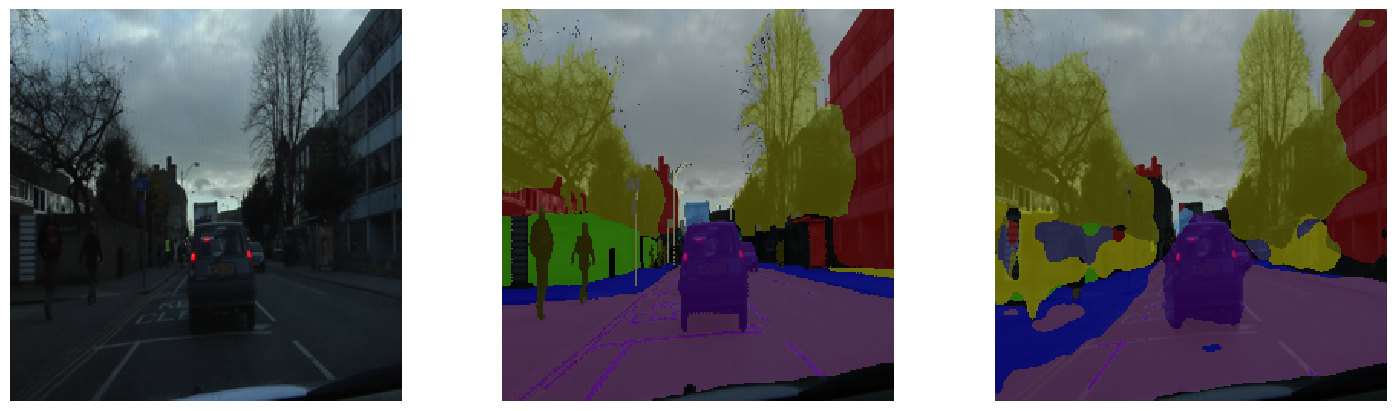

In [12]:
import matplotlib.pyplot as plt

colors = np.array([label[1] for label in labels])

def colorizeImage(image):
    return colors[np.argmax(image, axis=2)]


totalCheck = 10

for checkNum in range(totalCheck):
    predictionToShow = predictions[checkNum]
    groundTruth = test_y[checkNum]
    
    originalImage = test_x[checkNum]
    groundImage = (colorizeImage(groundTruth) / 255.0 + originalImage) * 0.5
    predictionImage = (colorizeImage(predictionToShow) / 255.0 + originalImage) * 0.5
    
    fig = plt.figure(figsize=(18, 6 * totalCheck)) 
    fig.add_subplot(totalCheck, 3, checkNum * 3 + 1) 
    plt.axis('off')
    if not checkNum:
        plt.title("Original")
    plt.imshow(originalImage, interpolation='nearest')
    
    fig.add_subplot(totalCheck, 3, checkNum * 3 + 2) 
    plt.axis('off')
    if not checkNum:
        plt.title("Ground Truth")
    plt.imshow(groundImage, interpolation='nearest')
    
    fig.add_subplot(totalCheck, 3, checkNum * 3 + 3)
    plt.axis('off')
    if not checkNum:
        plt.title("Prediction")
    plt.imshow(predictionImage, interpolation='nearest')
    
plt.show()

In [7]:
model.save("Trained/trained.keras")